# Plant Leaf Classification

Applying machine learning models for classification of plant leaf images

### Importing necessary libraries

In [41]:
import numpy as np
import pandas as pd
import os
import string

### Reading the dataset

In [42]:
dataset = pd.read_csv("Flavia_features.csv")

In [43]:
dataset.head(5)

,Unnamed: 0,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,0,197484.0,3479.036038,1416,759,1.865613,5.442183,61.289480,6.395667,13.643413,4.388007,24.025329,40.200931,21.448412,12.639656,0.997666,0.911738,1.688689
1,0,101248.0,2490.381812,1190,130,9.153846,1.527931,61.255546,7.049316,9.232018,10.876066,33.816205,37.382221,46.479230,8.137424,0.997191,0.944818,1.193795
2,0,86570.5,2290.683327,1095,119,9.201681,1.505189,60.612219,3.434303,6.371511,2.644757,19.975699,29.057374,19.275050,8.553729,0.996610,0.959023,0.848758
3,0,190214.0,2856.479353,1318,254,5.188976,1.759976,42.896287,7.670415,13.303599,6.049157,28.822885,40.221845,26.948604,8.440041,0.998419,0.914331,1.673915
4,0,227727.0,2917.248904,1324,286,4.629371,1.662798,37.370804,8.992028,16.671171,6.294281,30.967158,45.040192,28.595326,8.641438,0.998568,0.898644,1.968082


In [44]:
type(dataset)

pandas.core.frame.DataFrame

In [45]:

ds_path = "..\\Flavia leaves dataset"
img_files = os.listdir(ds_path)

### Creating target labels

Breakpoints are used alongside the image file to create a vector of target labels. The breakpoints are specified in Flavia leaves dataset website.

In [46]:
breakpoints = [1001,1059,1060,1122,1552,1616,1123,1194,1195,1267,1268,1323,1324,1385,1386,1437,1497,1551,1438,1496,2001,2050,2051,2113,2114,2165,2166,2230,2231,2290,2291,2346,2347,2423,2424,2485,2486,2546,2547,2612,2616,2675,3001,3055,3056,3110,3111,3175,3176,3229,3230,3281,3282,3334,3335,3389,3390,3446,3447,3510,3511,3563,3566,3621]

In [47]:
target_list = []
for file in img_files:
    target_num = int(file.split(".")[0])
    flag = 0
    i = 0 
    for i in range(0,len(breakpoints),2):
        if((target_num >= breakpoints[i]) and (target_num <= breakpoints[i+1])):
            flag = 1
            break
    if(flag==1):
        target = int((i/2))
        target_list.append(target)

In [48]:
y = np.array(target_list)
y

array([ 0,  0,  0, ..., 31, 31, 31])

In [49]:
X = dataset.iloc[:,1:]

In [50]:
X.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,197484.0,3479.036038,1416,759,1.865613,5.442183,61.289480,6.395667,13.643413,4.388007,24.025329,40.200931,21.448412,12.639656,0.997666,0.911738,1.688689
1,101248.0,2490.381812,1190,130,9.153846,1.527931,61.255546,7.049316,9.232018,10.876066,33.816205,37.382221,46.479230,8.137424,0.997191,0.944818,1.193795
2,86570.5,2290.683327,1095,119,9.201681,1.505189,60.612219,3.434303,6.371511,2.644757,19.975699,29.057374,19.275050,8.553729,0.996610,0.959023,0.848758
3,190214.0,2856.479353,1318,254,5.188976,1.759976,42.896287,7.670415,13.303599,6.049157,28.822885,40.221845,26.948604,8.440041,0.998419,0.914331,1.673915
4,227727.0,2917.248904,1324,286,4.629371,1.662798,37.370804,8.992028,16.671171,6.294281,30.967158,45.040192,28.595326,8.641438,0.998568,0.898644,1.968082


In [51]:
y[0:5]

array([0, 0, 0, 0, 0])

### Train test split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 142)

In [54]:
X_train.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
147,816496.5,3599.018794,1101,1083,1.016620,1.460365,15.864044,36.740296,70.312576,25.082371,45.407495,81.167757,34.334657,22.519541,0.997333,0.649635,5.610553
837,921134.0,4097.732429,1377,1038,1.326590,1.551703,18.229064,34.696545,64.961098,23.699098,46.639467,69.345675,35.581559,92.360837,0.992630,0.560696,7.248010
358,552379.0,3850.814822,1398,1049,1.332698,2.654884,26.845291,29.863131,49.430173,23.717367,48.482326,77.065204,39.447077,23.181824,0.996204,0.751559,4.221778
962,38454.5,3035.410698,1176,822,1.430657,25.138072,239.600518,4.282973,5.213604,4.262034,27.772276,30.832106,28.934080,6.313081,0.993080,0.971889,0.634766
1101,941172.0,3719.580197,1303,987,1.320162,1.366446,14.700051,43.594426,72.467561,32.378145,47.408525,73.463707,37.026025,11.663863,0.998818,0.635070,6.042620


In [55]:
y_train[0:5]

array([ 3, 13,  6, 16, 18])

### Feature Scaling

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [58]:
X_train[0:2]

array([[ 0.83193192, -0.17692354, -0.90777284,  0.86491733, -0.9528451 ,
        -0.33789935, -0.42611352,  0.01198242,  0.22801441, -0.06515913,
        -0.03038517,  0.66513894, -0.17255204, -0.17456558,  0.27446021,
        -0.97141035,  0.72845056],
       [ 1.22949107,  0.46823763,  0.25932835,  0.67383324, -0.45412004,
        -0.31773827, -0.37146523, -0.04156278,  0.10823179, -0.10299271,
         0.04545738, -0.01454148, -0.11043539,  2.3536019 , -1.92405659,
        -1.86068666,  1.74156049]])

In [59]:
y_train[0:2]

array([ 3, 13])

### Applying SVM classifier model

In [60]:
from sklearn import svm

In [61]:
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [62]:
y_pred = clf.predict(X_test)

In [63]:
from sklearn import metrics

In [64]:
metrics.accuracy_score(y_test, y_pred)

0.7975567190226877

In [65]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.28      0.42        18
           1       0.65      0.72      0.68        18
           2       0.90      0.86      0.88        22
           3       0.81      0.96      0.88        27
           4       0.96      1.00      0.98        24
           5       0.89      1.00      0.94        16
           6       0.73      0.95      0.83        20
           7       0.83      0.71      0.77        14
           8       0.35      0.50      0.41        12
           9       0.93      0.93      0.93        15
          10       0.65      0.94      0.77        18
          11       0.92      0.61      0.73        18
          12       0.58      0.78      0.67        18
          13       0.94      0.71      0.81        24
          14       0.60      0.46      0.52        13
          15       0.44      0.22      0.30        18
          16       1.00      1.00      1.00        26
          17       0.94    

### Performing parameter tuning of the model

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
               'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
             ]

In [68]:
svm_clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
svm_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [69]:
svm_clf.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [70]:
means = svm_clf.cv_results_['mean_test_score']
stds = svm_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svm_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.060 (+/-0.037) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.198 (+/-0.018) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.600 (+/-0.051) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.832 (+/-0.056) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.843 (+/-0.053) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.859 (+/-0.045) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.199 (+/-0.016) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.606 (+/-0.056) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.838 (+/-0.049) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.889 (+/-0.036) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.883 (+/-0.021) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.869 (+/-0.021) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.603 (+/-0.058) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.839 (+/-0.049) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.890 (+/-0.028) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.888 (+/-0.014) for {'C': 100, 'gamma': 0.1, 'kernel':

In [71]:
y_pred_svm = svm_clf.predict(X_test)

In [72]:
metrics.accuracy_score(y_test, y_pred_svm)

0.8987783595113438

In [73]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        18
           1       0.88      0.83      0.86        18
           2       1.00      0.86      0.93        22
           3       0.96      0.93      0.94        27
           4       1.00      1.00      1.00        24
           5       0.89      1.00      0.94        16
           6       0.79      0.95      0.86        20
           7       0.92      0.86      0.89        14
           8       0.50      0.58      0.54        12
           9       1.00      1.00      1.00        15
          10       0.88      0.83      0.86        18
          11       0.82      0.78      0.80        18
          12       0.89      0.89      0.89        18
          13       0.86      0.79      0.83        24
          14       0.79      0.85      0.81        13
          15       0.75      0.83      0.79        18
          16       1.00      1.00      1.00        26
          17       0.94    

### Dimensionality Reduction using PCA

In [74]:
from sklearn.decomposition import PCA

In [75]:
pca = PCA()

In [76]:
pca.fit(X)

PCA()

In [77]:
var= pca.explained_variance_ratio_
var

array([9.99992897e-01, 6.41437085e-06, 3.92824599e-07, 2.08042088e-07,
       6.15522995e-08, 1.38782111e-08, 8.94933506e-09, 2.51990655e-09,
       8.66436338e-10, 2.10139778e-10, 1.07067132e-10, 1.32410441e-11,
       2.22566990e-12, 1.41983601e-12, 5.16456146e-13, 3.39145452e-15,
       1.00669705e-17])

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

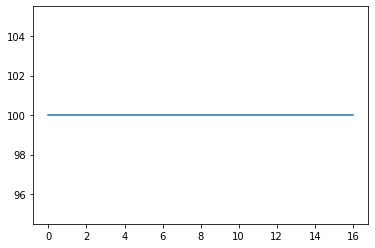

In [79]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

### Testing with mobile captured leaves which are not classified

In [1]:
import os
import cv2

In [ ]:
def bg_sub(filename):
    test_img_path = '..\\mobile captures\\' + filename
    main_img = cv2.imread(test_img_path)
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(img, (1600, 1200))
    size_y,size_x,_ = img.shape
    gs = cv2.cvtColor(resized_image,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (55,55),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    
    contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    contains = []
    y_ri,x_ri, _ = resized_image.shape
    for cc in contours:
        yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
        contains.append(yn)

    val = [contains.index(temp) for temp in contains if temp>0]
    index = val[0]
    
    black_img = np.empty([1200,1600,3],dtype=np.uint8)
    black_img.fill(0)
    
    cnt = contours[index]
    mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)
    
    maskedImg = cv2.bitwise_and(resized_image, mask)
    white_pix = [255,255,255]
    black_pix = [0,0,0]
    
    final_img = maskedImg
    h,w,channels = final_img.shape
    for x in range(0,w):
        for y in range(0,h):
            channels_xy = final_img[y,x]
            if all(channels_xy == black_pix):
                final_img[y,x] = white_pix
    
    return final_img

In [ ]:
filename = 'Test.jpg' 
bg_rem_img = bg_sub(filename)

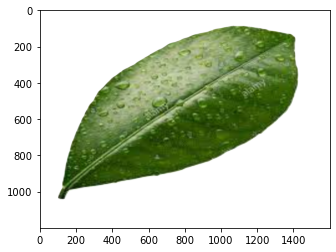

In [ ]:
plt.imshow(bg_rem_img)

In [ ]:
import mahotas as mt

In [ ]:
def feature_extract(img):
    names = ['area','perimeter','pysiological_length','pysiological_width','aspect_ratio','rectangularity','circularity', \
             'mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b', \
             'contrast','correlation','inverse_difference_moments','entropy'
            ]
    df = pd.DataFrame([], columns=names)

    #Preprocessing
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (25,25),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

    #Shape features
    contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    M = cv2.moments(cnt)
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    rectangularity = w*h/area
    circularity = ((perimeter)**2)/area

    #Color features
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]
    blue_channel[blue_channel == 255] = 0
    green_channel[green_channel == 255] = 0
    red_channel[red_channel == 255] = 0

    red_mean = np.mean(red_channel)
    green_mean = np.mean(green_channel)
    blue_mean = np.mean(blue_channel)

    red_std = np.std(red_channel)
    green_std = np.std(green_channel)
    blue_std = np.std(blue_channel)

    #Texture features
    textures = mt.features.haralick(gs)
    ht_mean = textures.mean(axis=0)
    contrast = ht_mean[1]
    correlation = ht_mean[2]
    inverse_diff_moments = ht_mean[4]
    entropy = ht_mean[8]

    vector = [area,perimeter,w,h,aspect_ratio,rectangularity,circularity,\
              red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
              contrast,correlation,inverse_diff_moments,entropy
             ]

    df_temp = pd.DataFrame([vector],columns=names)
    df = df.append(df_temp)
    
    return df

In [ ]:
features_of_img = feature_extract(bg_rem_img)
features_of_img

,area,perimeter,pysiological_length,pysiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,749779.5,3854.470463,1324,954,1.387841,1.684623,19.815082,37.06184,48.408661,22.636218,54.593298,65.26823,42.119357,18.025798,0.998498,0.762715,5.270181


In [ ]:
scaled_features = sc_X.transform(features_of_img)
print(scaled_features)
# y_pred_mobile = svm_clf.predict(features_of_img)
y_pred_mobile = svm_clf.predict(scaled_features)
y_pred_mobile[0]

[[ 0.57793365  0.15783302  0.04026126  0.31962593 -0.35858696 -0.29032875
  -0.3357242   0.02040671 -0.26225655 -0.13206332  0.53511064 -0.24894925
   0.21525673 -0.33723243  0.81949998  0.15924646  0.51786043]]


27

In [ ]:
common_names = ['pubescent bamboo','Chinese horse chestnut','Anhui Barberry', \
                'Chinese redbud','true indigo','Japanese maple','Nanmu',' castor aralia', \
                'Chinese cinnamon','goldenrain tree','Big-fruited Holly','Japanese cheesewood', \
                'wintersweet','camphortree','Japan Arrowwood','sweet osmanthus','deodar','ginkgo, maidenhair tree', \
                'Crape myrtle, Crepe myrtle','oleander','yew plum pine','Japanese Flowering Cherry','Glossy Privet',\
                'Chinese Toon','peach','Ford Woodlotus','trident maple','Beales barberry','southern magnolia',\
                'Canadian poplar','Chinese tulip tree','tangerine'
               ]
print(common_names[y_pred_mobile[0]])

Beales barberry
